# Aula 16 - Estatística pt1 - Definições

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Probabilidade
- 3) Distribuições de probabilidade
_____________

### Problema gerador: em um jogo da Copa do Mundo de futebol, a quantidade média de gols é aproximadamente `3`. Assim sendo, qual é a probabilidade de em determinada partida não haver gols? E a probabilidade de haver 4 gols?

Fonte da informação [aqui!](https://www.sportshistori.com/2022/11/avg-goals-scored-per-game-at-every-fifa-world-cup-since-1930.html)

In [1]:
dados = '''
Uruguay 1930 FIFA World Cup -- 4.375

Italy 1934 FIFA World Cup -- 4.12

France 1938 FIFA World Cup -- 4.67

Brazil 1950 FIFA World Cup -- 4

Switzerland 1954 FIFA World Cup -- 5.38

Sweden 1958 FIFA World Cup -- 3.6

Chile 1962 FIFA World Cup -- 2.79

England 1966 FIFA World Cup -- 2.79

Mexico 1970 FIFA World Cup -- 2.97

West Germany 1974 FIFA World Cup -- 2.55

Argentina 1978 FIFA World Cup -- 2.68

Spain 1982 FIFA World Cup -- 2.81

Mexico 1986 FIFA World Cup -- 2.54

Italy 1990 FIFA World Cup -- 2.21

United States 1994 FIFA World Cup -- 2.71

France 1998 FIFA World Cup -- 2.67

South Korea and Japan 2002 FIFA World Cup -- 2.52

Germany 2006 FIFA World Cup -- 2.30

South Africa 2010 FIFA World Cup -- 2.27

Brazil 2014 FIFA World Cup -- 2.67

Russia 2018 FIFA World Cup -- 2.64

Qatar 2022 FIFA World Cup --  2.69'''

In [7]:
dados.split("\n\n")

['\nUruguay 1930 FIFA World Cup -- 4.375',
 'Italy 1934 FIFA World Cup -- 4.12',
 'France 1938 FIFA World Cup -- 4.67',
 'Brazil 1950 FIFA World Cup -- 4',
 'Switzerland 1954 FIFA World Cup -- 5.38',
 'Sweden 1958 FIFA World Cup -- 3.6',
 'Chile 1962 FIFA World Cup -- 2.79',
 'England 1966 FIFA World Cup -- 2.79',
 'Mexico 1970 FIFA World Cup -- 2.97',
 'West Germany 1974 FIFA World Cup -- 2.55',
 'Argentina 1978 FIFA World Cup -- 2.68',
 'Spain 1982 FIFA World Cup -- 2.81',
 'Mexico 1986 FIFA World Cup -- 2.54',
 'Italy 1990 FIFA World Cup -- 2.21',
 'United States 1994 FIFA World Cup -- 2.71',
 'France 1998 FIFA World Cup -- 2.67',
 'South Korea and Japan 2002 FIFA World Cup -- 2.52',
 'Germany 2006 FIFA World Cup -- 2.30',
 'South Africa 2010 FIFA World Cup -- 2.27',
 'Brazil 2014 FIFA World Cup -- 2.67',
 'Russia 2018 FIFA World Cup -- 2.64',
 'Qatar 2022 FIFA World Cup --  2.69']

In [8]:
x = '\nUruguay 1930 FIFA World Cup -- 4.375'

float(x.split(" -- ")[1])

4.375

In [9]:
media_de_gols = [float(x.split(" -- ")[1]) for x in dados.split("\n\n")]

media_de_gols

[4.375,
 4.12,
 4.67,
 4.0,
 5.38,
 3.6,
 2.79,
 2.79,
 2.97,
 2.55,
 2.68,
 2.81,
 2.54,
 2.21,
 2.71,
 2.67,
 2.52,
 2.3,
 2.27,
 2.67,
 2.64,
 2.69]

In [10]:
import numpy as np

np.array(media_de_gols).mean()

3.0888636363636364

____

## 1) Introdução

Hoje iniciaremos nossa introdução a **Probabilidade e Estatística**.

Essas duas áreas são extremamente amplas, e fornecem toda a base da ciência de dados. Por isso, vamos dar uma olhada nos principais conceitos!

A probabilidade e estatística podem ser dividias nos seguintes três pilares:

- **Probabilidade**: é a teoria matemática utilizada para se estudar a incerteza oriundas de `fenômenos`de caráter aleátorio.<br><br>

- **Estatística Descritiva**: Etapa inicial da análise estatística, tendo como objetivo tirar informações prévias de modo informal e direto. A ideia é obter informações que `resumam` o conjuto de dados, a fim que estes possam ser `descritos`, e conclusões iniciais possam ser tiradas.

    - Já usamos várias dessas técnicas (sem saber explicitamente) no processo de EDA!<br><br>

- **Inferência estatística**: É o conjunto de técnicas que possibilitam a extrapolação de conclusões tiradas a partir de um conjunto pequeno de dados (denominado `amostra`) para todo o universo sob análise (denominado (`população`).

<img src="https://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2012/07/mod10-big_picture_inference.gif" width="600">

Antes de explorarmos cada um desses três pilares mais a fundo, é importante formalizarmos os **tipos de dados** com os quais trabalharemos:

### 1.1) Tipos de variáveis 

- **Variavél qualitativa** *nominal* 

> Valores que expressam **atributos sem nenhum tipo de ordem**. Ex : sexo, estado civil, país de origem, ser fumante ou não, etc.

    - São representados por strings


- **Variavél qualitativa** *ordinal* 

> Valores que expressam **atributos com algum tipo de ordem ou grau**. Ex: escolaridade, resposta de um paciente (piora, igual, melhora), classe social(alta, média, baixa), classe do navio, etc.

    - São representados por strings, ou possivelmente números inteiros

________________


- **Variavél quantitativa** *discreta*  

> Valores numéricos inteiros. Ex: idade em anos inteiros, número de banheiros em uma casa, número de filhos, etc.

    - São representados por ints

- **Variavél quantitativa** *contínua*  

> Valores numéricos racionais. Ex: salário, preço, temperatura, gorjeta, etc.

    - São representados por floats

In [11]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

___
___
___

## 2) Probabilidade

Probabilidade é a área da matemática que estuda **eventos aleatórios**, cujos resultados são **probabilísticos** ou **estocásticos**.

Existem poucos sistemas na natureza que são de fato inerentemente aleatórias e não-determinísticas. No entanto, uma descrição determinística pode ser muito complicada, de modo que **se torna conveniente** tratar o sistema como um sistema estocástico.

Ex.: lançamento de moeda, lançamento de dados, etc.

O objetivo da estatística é similar: analisar dados ou criar modelos que **generalizem relações** que não podem ser determinadas diretamente uma vez que não temos acesso à população. Neste sentido, há muita probabilidade envolvida em estatística, e é por isso que vamos olhar para os principais conceitos de probabilidade.

_____

### 2.1) Variável aleatória

Uma **variável aleatória** é uma variável cujo valor depende de fatores **não-deterministícos**, isto é, **probabilísticos**. 

**Exemplo**: resultado do lançamento de um dado; o quanto de gorjeta será dado num restaurante; sobrevivência ao Titanic.

_____

### 2.2) Espaço amostral

Chamamos de **espaço amostral** o conjunto de **todos os resultados possíveis de um certo fenômeno aleatório**, ou seja, **os valores possíveis que a variável aleatória de interesse pode assumir**. Representamos o espaço amostral pela letra grega $\Omega$. 

Os subconjuntos de $\Omega$ são denominados **eventos** e representados pelas letras latinas maiúsculas A, B, etc. 

**Exemplo**: o espaço amostral dos resultados do lançamento de um dado é:

$$ \Omega = \{1, 2, 3, 4, 5, 6\} $$

Alguns eventos possíveis são:

- Evento A = {3} : o resultado do lançamento do dado foi 3;
- Evento B = {5} : o resultado do lançamento do dado foi 5.

**Exemplo 2**: considere o lançamento de uma moeda:

<img src="https://www.vertica.com/wp-content/uploads/2019/07/Coin_Flip_183981489-2160.jpg" width=300>

- Se lançarmos uma única moeda:
    - A variável aleatória será **o resultado do lançamento da moeda**
    - Portanto, o espaço amostral é: $$ \Omega = \{ K, C \} $$
    
- Se lançarmos duas moedas:
    - A variável aleatória será **o resultado do lançamento de cada moeda**
    - Portanto, o espaço amostral é: $$ \Omega = \{ (K, K), (K, C), (C, K), (C, C) \} $$

**Exemplo 3**: espaço amostral de algumas variáveis da base do Titanic

In [20]:
df_titanic = pd.read_csv("titanic_completa_oficial.csv", na_values="?")

df_titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [21]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [24]:
df_titanic["pclass"].unique()

array([1, 2, 3], dtype=int64)

In [25]:
df_titanic["survived"].unique()

array([1, 0], dtype=int64)

In [26]:
df_titanic["embarked"].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [27]:
df_titanic["age"].unique()

array([29.    ,  0.9167,  2.    , 30.    , 25.    , 48.    , 63.    ,
       39.    , 53.    , 71.    , 47.    , 18.    , 24.    , 26.    ,
       80.    ,     nan, 50.    , 32.    , 36.    , 37.    , 42.    ,
       19.    , 35.    , 28.    , 45.    , 40.    , 58.    , 22.    ,
       41.    , 44.    , 59.    , 60.    , 33.    , 17.    , 11.    ,
       14.    , 49.    , 76.    , 46.    , 27.    , 64.    , 55.    ,
       70.    , 38.    , 51.    , 31.    ,  4.    , 54.    , 23.    ,
       43.    , 52.    , 16.    , 32.5   , 21.    , 15.    , 65.    ,
       28.5   , 45.5   , 56.    , 13.    , 61.    , 34.    ,  6.    ,
       57.    , 62.    , 67.    ,  1.    , 12.    , 20.    ,  0.8333,
        8.    ,  0.6667,  7.    ,  3.    , 36.5   , 18.5   ,  5.    ,
       66.    ,  9.    ,  0.75  , 70.5   , 22.5   ,  0.3333,  0.1667,
       40.5   , 10.    , 23.5   , 34.5   , 20.5   , 30.5   , 55.5   ,
       38.5   , 14.5   , 24.5   , 60.5   , 74.    ,  0.4167, 11.5   ,
       26.5   ])

_____

### 2.4) Definição de probabilidade

Definimos uma função $P(.)$ denominada **probabilidade** que deve satisfazer as seguintes propriedades:
    
- $0\leq P(A) \leq 1$ 

- $ P(\Omega)=\sum_{A_i \in \Omega}P(A_{i})=1$

**Exemplo**: considere o lançamento de uma moeda honesta:

O espaço amostral é: $\Omega = \{ K, C \}$.

Pra uma moeda honesta, temos $P(K) = P(c) = \frac{1}{2}$.

De fato, note como $0 \leq P(A) \leq 1$. E, além disso,

$$ P(\Omega) = \sum_{A_i \in  \{ K, C \}}P(A_{i}) = P(K) + P(C) = \frac{1}{2} + \frac{1}{2} = 1 $$


#### 2.4.1) Atribuindo probabilidades aos elementos do espaço amostral

Há, essencialmente, duas formas de se **atribuir a probabilidade de cada evento**:

> 1) Baseando-se em características teóricas acerca do experimento.

**Exemplo**: ao lançarmos um dado, temos o espaço amostral $\Omega=\{1,2,3,4,5,6\}$.

Admitindo que o dado foi construído de forma homogênea e com medidas rigorosamente simétricas, não temos nenhuma razão para **privilegiar uma face em detrimento das demais**.

Assim, consideramos: $p(1) = p(2) = p(3) = p(4) = p(5) = p(6) = \frac{1}{6}$ 

> 2) Fazendo muitos experimentos.

**Exemplo**: imagine que temos uma moeda não-honesta, que tende cair mais vezes coroa do que cara. Para descobrirmos qual é a probabilidade de cada um dos eventos ($\Omega = \{K, C\}$), podemos lançar a moeda muitas vezes, e anotar os resultados:

In [28]:
N = 10000
cara = 5847
coroa = N - cara

print(cara, coroa)

5847 4153


In [29]:
p_cara = cara/N
p_coroa = coroa/N

print(p_cara, p_coroa)

0.5847 0.4153


In [33]:
N = 10000
cara = 5010
coroa = N - cara

print(cara, coroa)

p_cara = cara/N
p_coroa = coroa/N

print(p_cara, p_coroa)

5010 4990
0.501 0.499


In [72]:
pd.Series(np.random.randint(0, 2, 1000000)).value_counts(normalize=True)

0    0.500157
1    0.499843
dtype: float64

No caso do Titanic, podemos atribuir probabilidades de acordo com **as observações coletadas**.

Isso é facilmente calculado com o `value_counts()`:

In [75]:
df_titanic["pclass"].unique()

array([1, 2, 3], dtype=int64)

In [76]:
df_titanic["pclass"].value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: pclass, dtype: float64

In [77]:
1 - (0.246753 + 0.211612)

0.541635

#### 2.4.2) Eventos complementares

A probabilidade de ocorrência de um evento pode ser definida diretamente pela probabilidade de **não ocorrência dele**: $ A^{c}$ é a não ocorrência de $A$, de modo que, naturalmente, $ P(A) = 1 - P(A^{c})$

Ou seja, $P(A) + P(A^{c}) = 1$, o que faz sentido, segundo a definição de probabilidade!

Quando temos um espaço amostral de apenas dois elementos (lançamento de uma moeda, ou a sobrevivência ao Titanic, por exemplo), isso fica ainda mais evidente:

In [80]:
df_titanic["survived"].unique()

array([1, 0], dtype=int64)

In [81]:
df_titanic["survived"].value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

In [82]:
df_titanic["survived"].mean()

0.3819709702062643

_____

### 2.5) Probabilidade Condicional e Independência

Utilizamos a notação $P(A|B)$ pra indicar a **probabilidade condicional de A dado B**, ou seja, probabilidade do evento $A$ ocorrer, dado que ocorreu o evento $B$.

Se os eventos $A$ e $B$ forem **dependentes**, temos que a ocorrência de $B$ influencia a ocorrência de $A$, ou seja, $P(A|B) \neq P(A)$.

**Eventos independentes** são tais que $P(A|B) = P(A)$, ou seja, a ocorrência do evento $B$ não influencia a probabilidade de ocorrência do evento $A$.

> No caso do Titanic: a **classe** influencia na **sobrevivência**?

In [86]:
df_titanic["survived"].mean()

0.3819709702062643

In [93]:
df_titanic.query("pclass == 1")["survived"].mean()

0.6191950464396285

In [94]:
df_titanic.groupby("pclass")[["survived"]].mean()

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


____

## 3) Distribuições de probabilidade

Uma **distribuição de probabilidade** é uma função que descreve o comportamento aleatório de um fenômeno dependente do acaso.

A distribuição de probabilidade pode **modelar incertezas** e descrever fenômenos físicos, biológicos, econômicos, entre outros.

Para representar a distribuição matematicamente, frequentemente utilizamos a [função densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function). Esta função é tal que a probabilidade da variável aleatória cair em uma faixa particular é dada **pela integral da densidade dessa variável sobre tal faixa** - isto é, é dada pela área abaixo da função densidade mas acima do eixo horizontal e entre o menor e o maior valor dessa faixa.

<img src="https://work.thaslwanter.at/Stats/html/_images/PDF.png" width=400>

Quando estamos trabalhando com uma amostra de dados, sobretudo de variáveis numéricas, é coum visualizarmos a distribuição dos valores amostrais, como sendo a ocorrência de cada um dos valores do espaço amostral que foram observados na amostra.

Agora entendemos que, ao visualizar uma distribuição, estamos visualizando a probabilidade de determinados valores serem observados, de acordo com o que de fato foi observado na amostra!

In [96]:
df_titanic["age"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

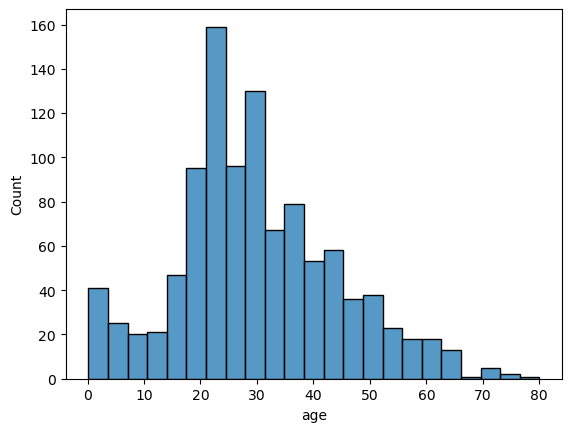

In [97]:
sns.histplot(data=df_titanic, x="age");

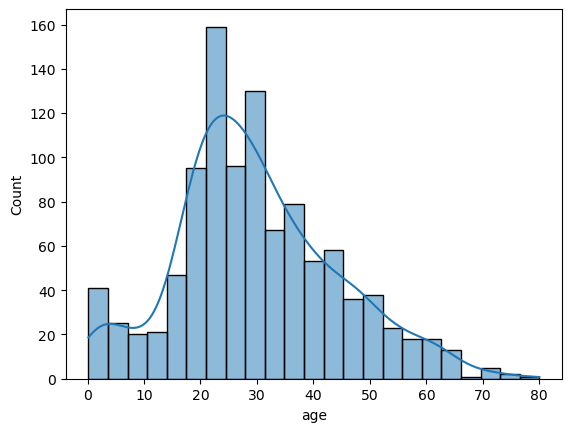

In [99]:
sns.histplot(data=df_titanic, x="age", kde=True);

E agora entendemos um pouco mais o KDE (kernel **density** estimate). Note como o eixo y muda de `Count` para `Density`, de modo que a área total sob a curva seja 1!

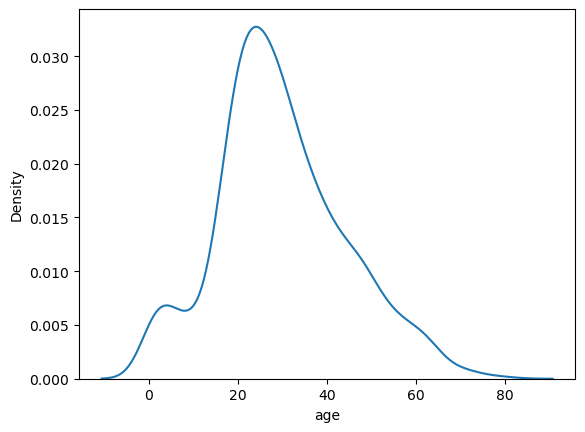

In [98]:
sns.kdeplot(data=df_titanic, x="age");

Vamos conhecer agora alguns exemplos de distribuições importantes!

__________

### **3.1) Distribuição de Bernoulli**

Muitos experimentos são tais que os resultados **apresentam ou não** uma determinada característica. Por exemplo:

- Uma moeda é lançada: o resultado ou é cara ou não é (ocorrendo, então, coroa);
- Uma peça escolhida ao acaso de um lote: essa peça ou é defeituosa ou não é;
- Um passageiro do Titanic escolhido ao acaso: sobreviveu ou morreu?

Em todos esses casos estamos interessados na ocorrência de sucesso (cara, peça não defeituosa, etc.) ou fracasso (coroa, peça defeituosa, etc.). 

Para cada experimento acima, podemos definir uma V.A. $X$ que assume apenas dois valores: 1, se ocorrer sucesso e 0, se ocorrer fracasso. Indicaremos por $p$ a probabilidade de sucesso.

**Definição:**

A variável aleatória $X$, que assume apenas valores 0 e 1 com função de probabilidade $(X, p(X))$ é dita variável aleatória de Bernoulli tal que:

- $p(0) = P(X=0) = 1-p$

- $p(1) = P(X=1) = p$

Usaremos a notação $X \sim Ber(p)$ para indicar uma V.A. com distribuição Bernoulli de parâmetro $p$.

> Esta é uma **distribuição de probabilidade discreta**, uma vez que o espaço amostral é discreto -- havendo, inclusive, apenas dois valores possíveis: 0 ou 1.

In [1]:
import scipy

In [2]:
resultado_ber = scipy.stats.bernoulli.rvs(p=0.5, size=1000000)

pd.Series(resultado_ber).value_counts(normalize=True)

NameError: name 'pd' is not defined

In [3]:
sns.countplot(resultado_ber);

NameError: name 'sns' is not defined

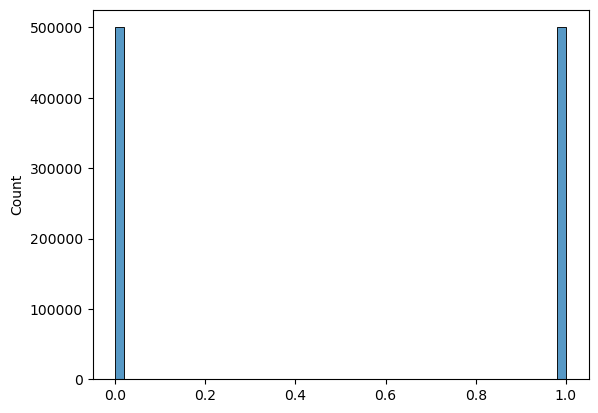

In [127]:
sns.histplot(resultado_ber);

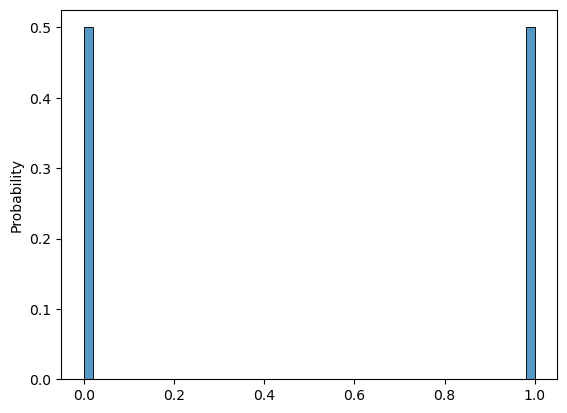

In [130]:
sns.histplot(resultado_ber, stat="probability");

Para o caso do titanic:

In [132]:
df_titanic["survived"]

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

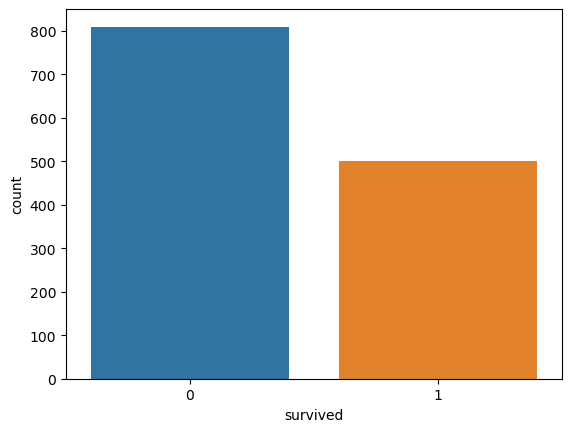

In [134]:
sns.countplot(data=df_titanic, x="survived");

In [135]:
df_titanic["survived"].mean()

0.3819709702062643

In [136]:
df_titanic["survived"].value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

_________

### **3.2) Distribuição de Poisson**


É largamente empregada quando se deseja contar **a quantidade de eventos** de certo tipo que ocorrem num intervalo de tempo ou espaço.

Exemplos:

- Número de chamadas recebidas por um telefone durante 5 minutos;
- Número de falhas de um computador num dia de operação.
- Número de meteoritos maiores que 1 metro de diâmetro que atingem a Terra em um ano;
- O número de chicletes em cada bloco do chão:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Chewing_gum_on_a_sidewalk_in_Reykjav%C3%ADk.JPG/220px-Chewing_gum_on_a_sidewalk_in_Reykjav%C3%ADk.JPG">

**Definição**

Dizemos que a V.A. $N$ tem distribuição Poisson com parâmetro $\lambda > 0$ se:

$P(N=k) = \frac{e^{-\lambda}\lambda^k}{k!}, k=0,1,2,...$

#### **Características Importantes**

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado;
2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos;
3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

> Esta é uma **distribuição de probabilidade discreta**, uma vez que o espaço amostral é discreto, pois estamos interessados em **quantidades inteiras de ocorrência** de determinado evento em um dado intervalo.

### Exemplo: Delivery

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

**Qual o número médio de ocorrências por hora ($\lambda$)?**

In [4]:
l = 20

**Qual o número de ocorrências que queremos obter no período ($k$)?**

In [5]:
k = 15

### Solução 1

In [6]:
import math

In [7]:
math.factorial(5)

120

In [9]:
p_15 = (np.exp(-l)*(l**k))/math.factorial(k)

f"{p_15:.2%}"

NameError: name 'np' is not defined

### Solução 2

In [10]:
p_15_s = scipy.stats.poisson.pmf(k=k, mu=l)

f"{p_15_s:.2%}"

'5.16%'

In [11]:
experimento = {
    "número de ligações" : [],
    "probabilidade" : []
}

k_list = range(46)
for k in k_list:
    
    p = scipy.stats.poisson.pmf(k=k, mu=l)
    
    experimento["número de ligações"].append(k)
    experimento["probabilidade"].append(p)

In [12]:
experimento

{'número de ligações': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 'probabilidade': [2.061153622438558e-09,
  4.122307244877113e-08,
  4.122307244877118e-07,
  2.7482048299180785e-06,
  1.3741024149590382e-05,
  5.496409659836144e-05,
  0.00018321365532787177,
  0.0005234675866510618,
  0.0013086689666276534,
  0.002908153259172565,
  0.00581630651834512,
  0.01057510276062752,
  0.017625171267712562,
  0.02711564810417317,
  0.03873664014881865,
  0.05164885353175814,
  0.06456106691469761,
  0.07595419637023251,
  0.08439355152248075,
  0.0888353173920848,
  0.0888353173920848,
  0.08460506418293791,
  0.07691369471176195,
  0.06688147366240117,
  0.05573456138533489,
  0.04458764910826764,
  0.03429819162174451,
  0.025406067867958883,
  0.01814719133425623,
  0.0

In [13]:
df_experimento = pd.DataFrame(experimento)

df_experimento

NameError: name 'pd' is not defined

In [14]:
df_experimento["p_formatado"] = df_experimento["probabilidade"].apply(lambda x: f"{x:.9%}")

NameError: name 'df_experimento' is not defined

In [15]:
df_experimento

NameError: name 'df_experimento' is not defined

In [195]:
df_experimento["p_acum"] = df_experimento["probabilidade"].cumsum().apply(lambda x: f"{x:.9%}")

In [196]:
df_experimento

,número de ligações,probabilidade,p_formatado,p_acum
0,0,2.061154e-09,0.000000206%,0.000000206%
1,1,4.122307e-08,0.000004122%,0.000004328%
2,2,4.122307e-07,0.000041223%,0.000045551%
3,3,2.748205e-06,0.000274820%,0.000320372%
4,4,1.374102e-05,0.001374102%,0.001694474%
5,5,5.496410e-05,0.005496410%,0.007190884%
6,6,1.832137e-04,0.018321366%,0.025512250%
7,7,5.234676e-04,0.052346759%,0.077859008%
8,8,1.308669e-03,0.130866897%,0.208725905%
9,9,2.908153e-03,0.290815326%,0.499541231%


In [199]:
100 - 98.652531872

1.3474681280000027

### Qual a cara da distribuição?

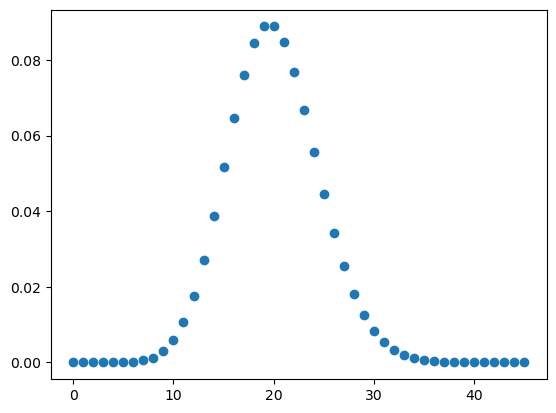

In [203]:
plt.scatter(df_experimento["número de ligações"], df_experimento["probabilidade"]);

_____ 

### De volta ao poblema gerador!

> Em um jogo da Copa do Mundo de futebol, a quantidade média de gols é aproximadamente `3`. Assim sendo, qual é a probabilidade de em determinada partida não haver gols? E a probabilidade de haver 4 gols?

A primeira coisa que devemos nos perguntar é se é justificável modelarmos a quantidade de gols em uma partida como uma variável aleatória distribuída segundo um processo de Poisson.

Assumindo isso, basta utilizarmos a distribuição de Poisson, e a função mdf:

In [204]:
l = 3

In [205]:
p_0_s = scipy.stats.poisson.pmf(k=0, mu=l)
p_0_s

0.049787068367863944

In [206]:
p_4_s = scipy.stats.poisson.pmf(k=4, mu=l)
p_4_s

0.16803135574154085

In [210]:
l = 3

experimento = {
    "número de gols" : [],
    "probabilidade" : []
}

k_list = range(15)
for k in k_list:
    
    p = scipy.stats.poisson.pmf(k=k, mu=l)
    
    experimento["número de gols"].append(k)
    experimento["probabilidade"].append(p)
    
# =========================================

df_experimento = pd.DataFrame(experimento)
df_experimento["p_formatado"] = df_experimento["probabilidade"].apply(lambda x: f"{x:.9%}")
df_experimento["p_acum"] = df_experimento["probabilidade"].cumsum().apply(lambda x: f"{x:.9%}")

In [211]:
df_experimento

,número de gols,probabilidade,p_formatado,p_acum
0,0,0.049787,4.978706837%,4.978706837%
1,1,0.149361,14.936120510%,19.914827347%
2,2,0.224042,22.404180766%,42.319008113%
3,3,0.224042,22.404180766%,64.723188878%
4,4,0.168031,16.803135574%,81.526324452%
5,5,0.100819,10.081881344%,91.608205797%
6,6,0.050409,5.040940672%,96.649146469%
7,7,0.021604,2.160403145%,98.809549614%
8,8,0.008102,0.810151179%,99.619700794%
9,9,0.002701,0.270050393%,99.889751187%


In [212]:
100 - 96.649146469

3.3508535309999985

_________

### **3.3) Distribuição Normal (Gaussiana)**

É representada por uma **curva simétrica em torno do seu ponto médio**, apresentando assim seu famoso formato de **sino** (*bell shape*).  

A distribuição normal modelo o comportamento de **diversos processos e fenômenos comuns**, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

Na distribuição normal, a média, mediana e moda dos dados possuem o mesmo valor, o que faz com que essa distribuição seja **simétrica com relação a estes valores**.

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">

Usaremos a notação $X \sim \mathcal{N}(\mu, \sigma^2)$ para representar uma variável aleatória distribuida segundo uma normal de média $\mu$ e variância $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500>

A função densidade de probabilidade da distribuição normal é dada por:

$$f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}$$

> Diferentemente das duas distribuições anteriores, a gaussiana é uma **distribuição de probabilidade contínua**, dado que a V.A. associada pode assumir qualquer valor real, $X \in \mathbb{R}$.

A distribuição normal é, muito provavelmente, a distribuição mais importante da estatística, sobretudo dado seu papel no famoso **Teorema Central do Limite**, que estudaremos em breve, no contexto da estatística inferencial.

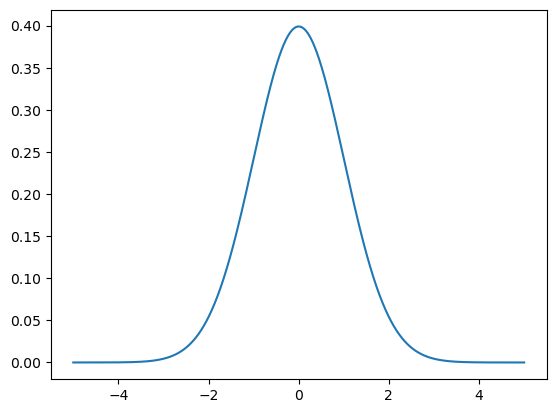

In [215]:
m, s = 0, 1

x = np.linspace(-5, 5, 100000)

y = (1/(s*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-m)/s)**2)

plt.plot(x, y);

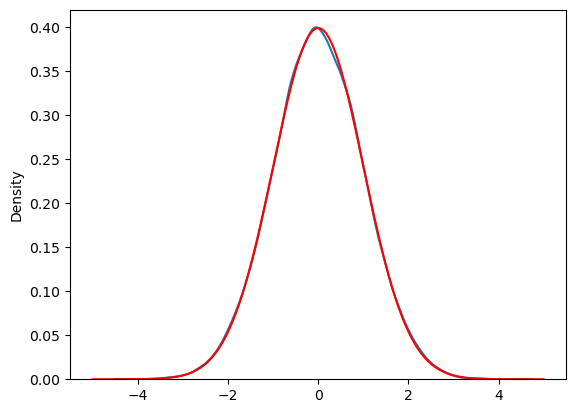

In [10]:
m, s = 0, 1
dados = np.random.normal(m, s, 100000)

# sns.histplot(dados, kde=True, stat="density");
sns.kdeplot(dados)

x = np.linspace(-5, 5, 100000)
y = (1/(s*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-m)/s)**2)
plt.plot(x, y, color="red");

In [12]:
import scipy

In [13]:
dados = np.random.normal(m, s, 100000)

In [15]:
dados = scipy.stats.norm.rvs(m, s, 100000)

In [16]:
dados

array([ 0.17579474, -0.74960819, -0.98322078, ...,  0.08803542,
        0.33320852,  0.26452385])

Na distribuição normal, os dados são distribuídos de forma muito particular, tal que o **desvio padrão** determina a proporção de dados em cada faixa:

<img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" width=500>

<img src="https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

In [25]:
dados[np.abs(dados) <= 1].shape[0]/100000

0.68313

In [26]:
dados[np.abs(dados) <= 2].shape[0]/100000

0.9549

In [27]:
dados[np.abs(dados) <= 3].shape[0]/100000

0.99746

<AxesSubplot:ylabel='Count'>

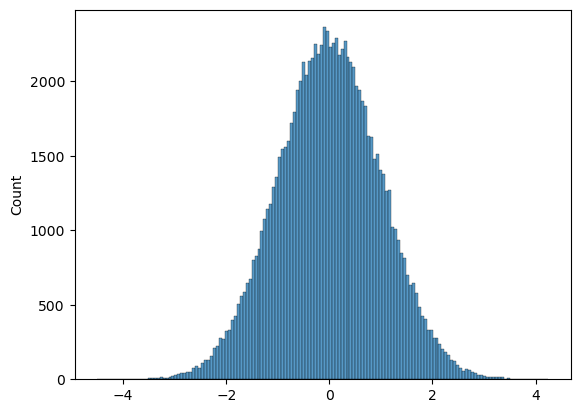

In [28]:
sns.histplot(dados)

____
____
____